## Digit Recognizer Project with Simple and Convolutional Neural Network using TensorFlow

### Taylan Tatlı, 10/09/2022 ###

 1)Introduction

 2)Data Pre-Processing 

        * Normalization
        * Reshaping
        * Label Encoding
        
 3)Classification with Simple Neural Network

 4)Classification with CNN**

 5)Results



### INTRODUCTION ###

This notebook contains the simple and convolutional neural network studies for Digit Recognizer Project, an image classification. Modelling with simple and convolutional neural network part also contains the studies on the overfitting problem. 

#### Overview of the Project 

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

In [1]:
# import neccesary modules and libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.preprocessing.image import ImageDataGenerator

### DATA PRE-PROCESSING



In [2]:
train=pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape,test.shape

((42000, 785), (28000, 784))

In [4]:
# put labels into y_train variable
y_train = train["label"]
# Drop 'label' column
x_train = train.drop(labels = ["label"],axis = 1) 

In [5]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, 'Classes')

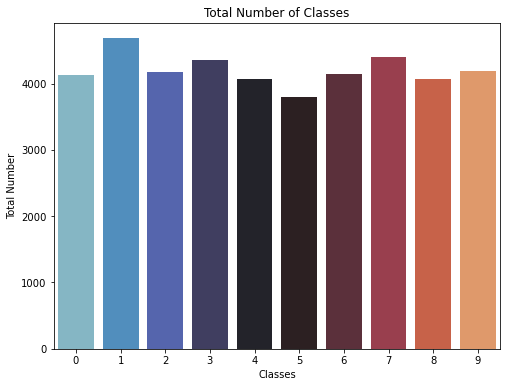

In [6]:
# visualize number of digits classes
plt.figure(figsize=(8,6))
g = sns.countplot(y_train, palette="icefire")
plt.title("Total Number of Classes")
plt.ylabel("Total Number")
plt.xlabel("Classes")
#y_train.value_counts()

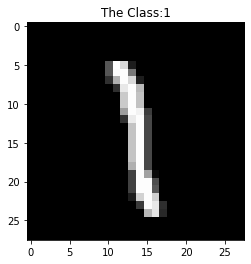

In [7]:
# See some images randomly
import random
def plot_random_image(x_train):
    image_num = random.randint(0,x_train.shape[0])
    image = x_train.iloc[image_num].to_numpy()
    image = image.reshape(28,28)
    plt.imshow(image, cmap="gray")
    plt.title("The Class:"+str(y_train.iloc[image_num]))
    plt.show()
    
    return image
rand_iamge=plot_random_image(x_train)

#### 2.1 Normalization

    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.The CNN converges faster on [0..1] data than [0..255].
    

In [8]:
## NORMALIZATION ##
x_train = x_train/255.0
test = test / 255.0
print("x_train shape: ",x_train.shape)
#print("test shape: ",test.shape)


x_train shape:  (42000, 784)


#### 2.2 Reshaping

    * Dataframe as 1D vectors of 784 values. So the images (28x28). We reshape all data to 28x28x1 3D matrices. Keras needs an extra dimension in the end which corresponds to channel. The images are gray scaled, so 1 channel is used.

In [9]:
## RESHAPING ##
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


#### 2.3 Label Encoding
    
    *Labels are 10 digits numbers from 0 to 9. It should be encoded to one hot vectors like 2 -> [0,0,1,0,0,0,0,0,0,0].

In [10]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical

In [11]:
# Label Encoding 
y_train = to_categorical(y_train, num_classes=10)
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### 2.4 Splitting Train and Test Sets

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [13]:
# Some examples
#plt.imshow(x_train[0],cmap='gray')
#plt.show()

## Modelling First Simple Neural Network 

In [14]:
# Now Model, FIRST SIMPLE LINEAR MODEL #
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(64, activation="relu"))
model_1.add(tf.keras.layers.Dense(32, activation="relu"))
model_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])
history1=model_1.fit(X_train, Y_train, epochs=10, validation_data = (X_val,Y_val))

Epoch 1/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.2876 - accuracy: 0.9115 - val_loss: 0.1704 - val_accuracy: 0.9483
Epoch 2/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.1354 - accuracy: 0.9590 - val_loss: 0.1562 - val_accuracy: 0.9510
Epoch 3/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.1074 - accuracy: 0.9668 - val_loss: 0.1228 - val_accuracy: 0.9629
Epoch 4/10
1182/1182 [==============================] - 1s 1ms/step - loss: 0.0874 - accuracy: 0.9733 - val_loss: 0.1054 - val_accuracy: 0.9683
Epoch 5/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.1288 - val_accuracy: 0.9662
Epoch 6/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0679 - accuracy: 0.9783 - val_loss: 0.1464 - val_accuracy: 0.9652
Epoch 7/10
1182/1182 [==============================] - 2s 1ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.1433 - val_accuracy:

In [15]:
results = pd.DataFrame(history1.history)
results

,loss,accuracy,val_loss,val_accuracy
0,0.287630,0.911481,0.170370,0.948333
1,0.135394,0.958968,0.156169,0.950952
2,0.107448,0.966799,0.122838,0.962857
3,0.087420,0.973307,0.105385,0.968333
4,0.070579,0.978069,0.128766,0.966190
5,0.067889,0.978280,0.146365,0.965238
6,0.058232,0.981402,0.143317,0.963095
7,0.047531,0.984683,0.137094,0.967143
8,0.044750,0.985476,0.133723,0.967619
9,0.043411,0.986376,0.131072,0.970476


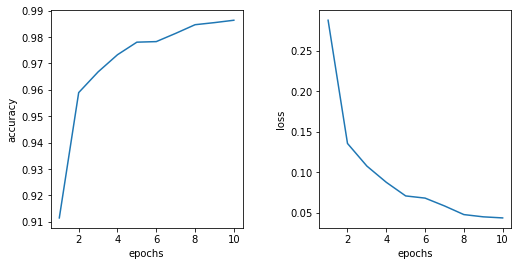

In [16]:
plt.figure(figsize=(8,4))
y_axis = results.loss# [i for i in results.loss]
x_axis = results.accuracy#[i for i in results.accuracy]
epochs= [i for i in range(1,11)]
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.1,
                    #bottom=0.1, 
                    right=0.9, 
                    #top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
                   
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs,x_axis)
plt.subplot(1,2,2)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,y_axis)


### CHECK OVERFITTING 

Recall: Neural Networks receive an input (a single vector), and transform it through a series of hidden layers. Each hidden layer is made up of a set of neurons, where each neuron is fully connected to all neurons in the previous layer, and where neurons in a single layer function completely independently and do not share any connections. The last fully-connected layer is called the “output layer” and in classification settings it represents the class scores.

Regular Neural Nets don’t scale well to full images. In CIFAR-10, images are only of size 32x32x3 (32 wide, 32 high, 3 color channels), so a single fully-connected neuron in a first hidden layer of a regular Neural Network would have 32*32*3 = 3072 weights. This amount still seems manageable, but clearly this fully-connected structure does not scale to larger images. For example, an image of more respectable size, e.g. 200x200x3, would lead to neurons that have 200*200*3 = 120,000 weights. Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! Clearly, this full connectivity is wasteful and the huge number of parameters would quickly lead to overfitting.

3D volumes of neurons. Convolutional Neural Networks take advantage of the fact that the input consists of images and they constrain the architecture in a more sensible way. In particular, unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth. (Note that the word depth here refers to the third dimension of an activation volume, not to the depth of a full Neural Network, which can refer to the total number of layers in a network.) For example, the input images in CIFAR-10 are an input volume of activations, and the volume has dimensions 32x32x3 (width, height, depth respectively). As we will soon see, the neurons in a layer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner. Moreover, the final output layer would for CIFAR-10 have dimensions 1x1x10, because by the end of the ConvNet architecture we will reduce the full image into a single vector of class scores, arranged along the depth dimension. 

More detail can be found : https://cs231n.github.io/convolutional-networks/

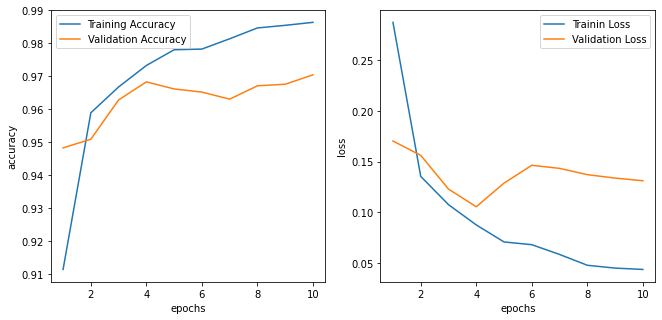

In [17]:
# Plot the loss and accuracy curves for training and validation 
def create_results(history):
    results = pd.DataFrame(history.history)
    plt.figure(figsize=(12,5))
    Train_loss = [i for i in results.loss]
    Validation_loss = [i for i in results.val_loss]
    Train_accuracy=[i for i in results.accuracy]
    Validation_accuracy=[i for i in results.val_accuracy]
    epochs= [i for i in range(1,11)]
    plt.subplot(1,2,1)
    plt.subplots_adjust(left=0.1,
                        #bottom=0.1, 
                        right=0.8, 
                        #top=0.9, 
                        wspace=0.2, 
                        hspace=0.2)

    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.plot(epochs,Train_accuracy,label="Training Accuracy")
    #plt.legend(loc='Training Accuracy')
    plt.plot(epochs,Validation_accuracy, label="Validation Accuracy")
    #plt.plot()
    plt.legend()
    plt.subplot(1,2,2)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(epochs,Train_loss, label="Trainin Loss")
    plt.plot(epochs,Validation_loss, label = "Validation Loss")
    plt.legend()
    plt.show()
    return results
results1 = create_results(history1)

**!!!  So it looks like an overfitting problem  !!!** The training and validation loss and accuracy values are not parallel and training values are much better than validation values.  There are somethings we could try to solve overfitting the model:

* Increasing the number of convolutional layers (for CNN).
* Increasing the number of convolutional filters (for CNN)
* Adding another dense layer or increasing the number of hidden layers to the output of the flattened layer(for both CNN and Simple Neural networks) ...

* But chosen and most generalized method to handle with overfitting for image classification models is Data Augmentation.

### Dealing with Overfitting: Data Augmentation


In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

Data Augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

For example, the number is not centered 
The scale is not the same (some who write with big/small numbers)
The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques.  

By applying just a couple of data augmentation techniques to our training data, we can easily double or triple the number of training examples and create a very robust model.



 <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [19]:
# Now Model, FIRST SIMPLE LINEAR MODEL  with Data Augmentation#

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(64, activation="relu"))
model_1.add(tf.keras.layers.Dense(32, activation="relu"))
model_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])
history = model_1.fit_generator(datagen.flow(X_train,Y_train, batch_size=250),
                              epochs =10, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // 250)

Epoch 1/10
151/151 [==============================] - 12s 78ms/step - loss: 0.9053 - accuracy: 0.7142 - val_loss: 0.3253 - val_accuracy: 0.9048
Epoch 2/10
151/151 [==============================] - 12s 78ms/step - loss: 0.4077 - accuracy: 0.8755 - val_loss: 0.2247 - val_accuracy: 0.9333
Epoch 3/10
151/151 [==============================] - 12s 80ms/step - loss: 0.3106 - accuracy: 0.9062 - val_loss: 0.1868 - val_accuracy: 0.9424
Epoch 4/10
151/151 [==============================] - 12s 78ms/step - loss: 0.2668 - accuracy: 0.9199 - val_loss: 0.1672 - val_accuracy: 0.9495
Epoch 5/10
151/151 [==============================] - 12s 78ms/step - loss: 0.2470 - accuracy: 0.9249 - val_loss: 0.1694 - val_accuracy: 0.9469
Epoch 6/10
151/151 [==============================] - 12s 79ms/step - loss: 0.2298 - accuracy: 0.9320 - val_loss: 0.1476 - val_accuracy: 0.9557
Epoch 7/10
151/151 [==============================] - 12s 79ms/step - loss: 0.2201 - accuracy: 0.9341 - val_loss: 0.1448 - val_accuracy:

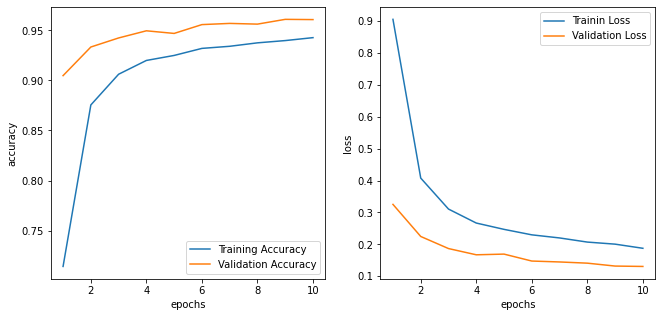

In [20]:
# Plot the loss and accuracy curves for training and validation 
results2=create_results(history)

**!!!  It looks better !!!*** Paralell and validation values are much better than training. Model_1 took long time with data augmentation than simple neural network without data augmentation since data augmentation increses the training data sizes.

## Now Convolutional Neural Network (CNN) Method

In [21]:
model2=tf.keras.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(5,5), padding="Same", activation ="relu"))#, input_shape=(28,28,2)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#model.add(tf.keras.Dropout(0.25))

model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="Same", activation ="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#model.add(tf.keras.Dropout(0.25))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation="relu"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
history2 = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=250),
                              epochs =10, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // 250)
#model.fit(X_train,Y_train,epochs=10,batch_size=250)

Epoch 1/10
151/151 [==============================] - 14s 88ms/step - loss: 0.7299 - accuracy: 0.7729 - val_loss: 0.1623 - val_accuracy: 0.9550
Epoch 2/10
151/151 [==============================] - 13s 88ms/step - loss: 0.2114 - accuracy: 0.9361 - val_loss: 0.1267 - val_accuracy: 0.9633
Epoch 3/10
151/151 [==============================] - 13s 87ms/step - loss: 0.1555 - accuracy: 0.9536 - val_loss: 0.1157 - val_accuracy: 0.9645
Epoch 4/10
151/151 [==============================] - 13s 86ms/step - loss: 0.1291 - accuracy: 0.9606 - val_loss: 0.0886 - val_accuracy: 0.9769
Epoch 5/10
151/151 [==============================] - 13s 87ms/step - loss: 0.1112 - accuracy: 0.9661 - val_loss: 0.0787 - val_accuracy: 0.9740
Epoch 6/10
151/151 [==============================] - 13s 86ms/step - loss: 0.1008 - accuracy: 0.9685 - val_loss: 0.0646 - val_accuracy: 0.9802
Epoch 7/10
151/151 [==============================] - 13s 87ms/step - loss: 0.0903 - accuracy: 0.9718 - val_loss: 0.0580 - val_accuracy:

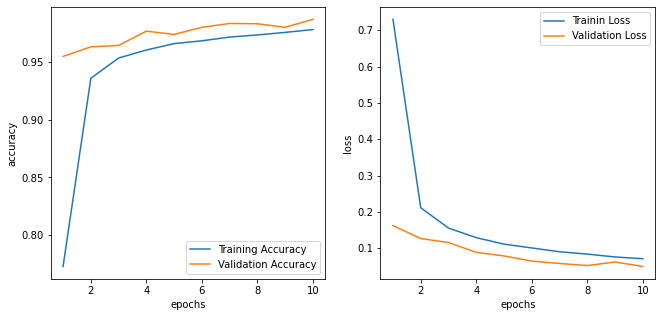

In [22]:
results3=create_results(history2)

**CNN GIVES BETTER RESULTS AS EXPECTED** And it takes shorter time as mention at the part of Data Augmentation.

### Now Predict and Show Results

132/132 [==============================] - 0s 3ms/step


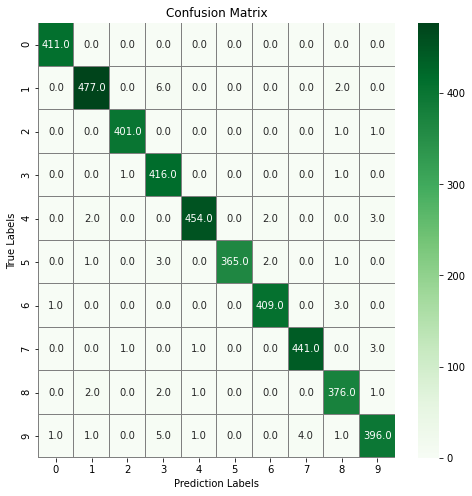

In [24]:
# confusion matrix
import seaborn as sns
#To predict the values from the validation dataset
y_pred = model2.predict(X_val)
#To convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# To convert validation observations to one hot vectors
y_true = np.argmax(Y_val,axis = 1) 
# To compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Prediction Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# To predict results
results = model2.predict(test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
Image_id=pd.Series(range(1,28001),name = "ImageId")
submission = pd.concat([Image_id,results],axis = 1)

submission.to_csv("Submission.csv")

875/875 [==============================] - 2s 3ms/step


In [29]:
submission


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
